<a href="https://colab.research.google.com/github/PedroAntonio321/filtrando-um-sinal-transformada-de-fourier-/blob/main/Usando_a_Transformada_de_Fourier_para_filtrar_um_sinal_de_%C3%A1udio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das Bibliotecas

In [4]:
import wave
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import freqz, firwin
from IPython.display import Audio

#Criando o Filtro Passa-Baixa e aplicando ao sinal de áudio

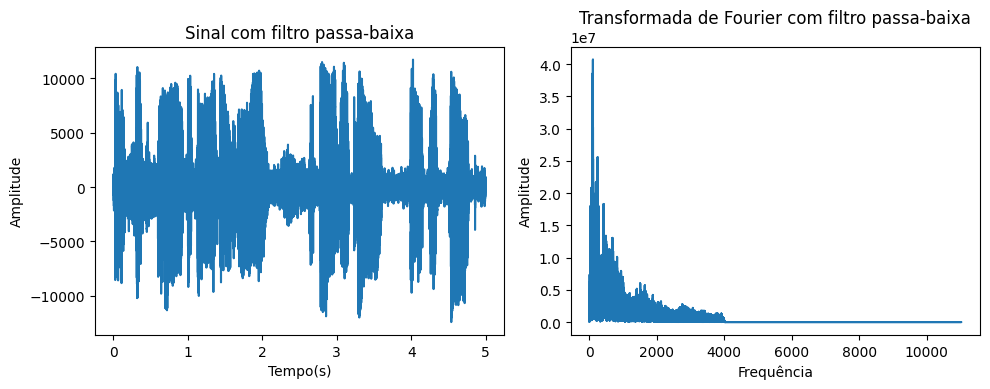

In [5]:
# Abrindo o arquivo de áudio
filewavdois = wave.open('/content/sinal 2.wav', 'rb')

# Quantidade de amostras
wavdois_samples = filewavdois.getnframes()

# Taxa de amostragem
Fs = filewavdois.getframerate()

# Lendo os dados do áudio
readwavdois= filewavdois.readframes(wavdois_samples)
wavdois_data = np.frombuffer(readwavdois, dtype=np.int16)

t = np.arange(0, wavdois_samples / Fs, 1 / Fs)

filewavdois.close()

# Calculando a transformada de Fourier
X = np.fft.fft(wavdois_data)

# Calculando as frequências correspondentes
F = np.fft.fftfreq(len(X), 1/Fs)

zero = np.where(F == 0)
X[zero] = X[zero] / 2.0;

#É possível determinar a frequência de corte
frequencia_de_corte = 4000
filter_order = 1001  # Ordem do filtro(aumente para ficar mais próximo de um filtro ideal)
h_passabaixa = firwin(filter_order, frequencia_de_corte, pass_zero='lowpass', fs=Fs)

w_passabaixa, H_passabaixa = freqz(h_passabaixa, worN=1024, fs=Fs)

H_transf_passabaixa = np.fft.fft(h_passabaixa, n=len(wavdois_data))
Z_passabaixa = X * H_transf_passabaixa
Z_passabaixa[0] = Z_passabaixa[0]/2

funcao_passabaixa = np.fft.ifft(Z_passabaixa)
funcao_real_passabaixa = np.real(funcao_passabaixa)

fig, (sinal, transformada) = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o sinal
sinal.plot(t, funcao_real_passabaixa)
sinal.set_xlabel('Tempo(s)')
sinal.set_ylabel('Amplitude')
sinal.set_title('Sinal com filtro passa-baixa')

# Plotando a transformada
transformada.plot(np.abs(F), 2*np.abs(Z_passabaixa))
transformada.set_xlabel('Frequência')
transformada.set_ylabel('Amplitude')
transformada.set_title('Transformada de Fourier com filtro passa-baixa')

plt.tight_layout()
plt.show()

##Escutando o áudio filtrado

In [5]:
max_original = np.max(np.abs(wavdois_data))
max_filtered = np.max(np.abs(funcao_real_passabaixa))
scale_factor = max_original / max_filtered
funcao_real_normal_passabaixa = funcao_real_passabaixa * scale_factor

# Converter o sinal filtrado normalizado para int16
funcao_normal_int16_passabaixa = np.int16(funcao_real_normal_passabaixa)
Audio(funcao_normal_int16_passabaixa, rate=Fs)

#Criando o Filtro Passa-Alta e aplicando ao sinal filtrado

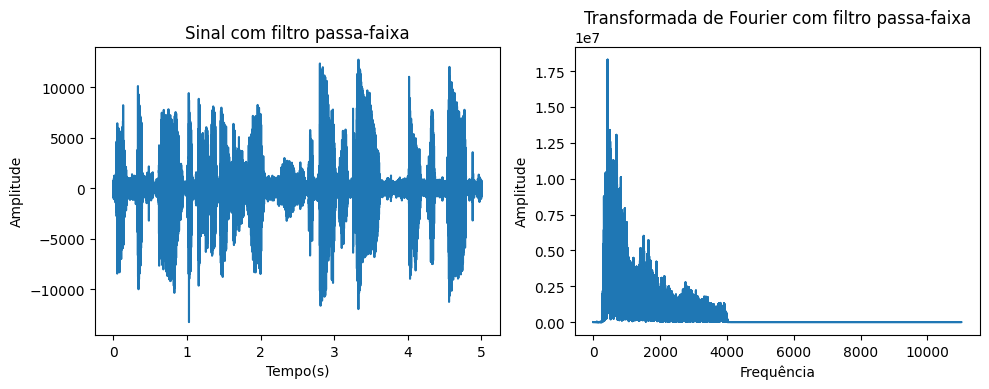

In [6]:
# Definindo a frequência de corte para o filtro passa-alta
frequencia_de_corte_passaalta = 300  # ajuste conforme necessário

# Criando o filtro passa-alta
h_passaalta = firwin(filter_order, frequencia_de_corte_passaalta, pass_zero='highpass', fs=Fs)

# Aplicando o filtro passa-alta
H_transf_passaalta = np.fft.fft(h_passaalta, n=len(wavdois_data))
Z_passaalta = Z_passabaixa * H_transf_passaalta
Z_passaalta[0] = Z_passaalta[0]/2

funcao_passaalta = np.fft.ifft(Z_passaalta)
funcao_real_passaalta = np.real(funcao_passaalta)

fig, (sinal, transformada) = plt.subplots(1, 2, figsize=(10, 4))

# Plotando o sinal
sinal.plot(t, funcao_real_passaalta)
sinal.set_xlabel('Tempo(s)')
sinal.set_ylabel('Amplitude')
sinal.set_title('Sinal com filtro passa-faixa')

# Plotando a transformada
transformada.plot(np.abs(F), 2*np.abs(Z_passaalta))
transformada.set_xlabel('Frequência')
transformada.set_ylabel('Amplitude')
transformada.set_title('Transformada de Fourier com filtro passa-faixa')

plt.tight_layout()
plt.show()


##Escutando o sinal filtrado

In [9]:
# Normalizando e convertendo para int16
max_original = np.max(np.abs(wavdois_data))
max_filtered = np.max(np.abs(funcao_real_passaalta))
scale_factor = max_original / max_filtered
funcao_real_normal_passaalta = funcao_real_passaalta * scale_factor
funcao_normal_int16_passaalta = np.int16(funcao_real_normal_passaalta)

# Reproduzindo o áudio resultante
Audio(funcao_normal_int16_passaalta, rate=Fs)